In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pycaret.regression import *

In [2]:
df = pd.read_csv("2001-2022storms.csv")

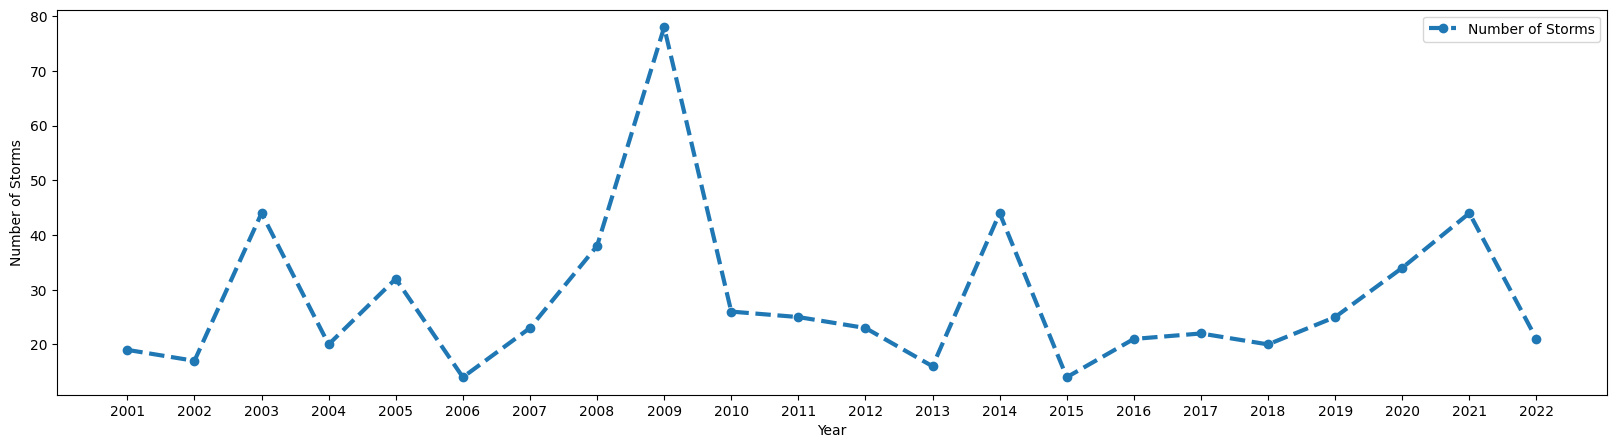

In [3]:

# Convert YEAR and MONTH columns to datetime format
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))

# Count the unique IDs each month per year
unique_id_counts = df.groupby(['YEAR', 'MONTH'])['ID'].nunique().reset_index(name='NUMBER_OF_STORMS')

# Group by year and count the number of unique storms
grouped_by_year = unique_id_counts.groupby('YEAR')['NUMBER_OF_STORMS'].sum().reset_index()

# Set plot size
plt.rcParams["figure.figsize"] = (20, 5)

# Plot the number of storms per year
plt.plot(grouped_by_year['YEAR'], grouped_by_year['NUMBER_OF_STORMS'], linewidth=3, linestyle='dashed', marker='o', label='Number of Storms')

# Set x-axis ticks for each individual year
plt.xticks(grouped_by_year['YEAR'])

# Set labels and legend
plt.xlabel('Year')
plt.ylabel('Number of Storms')
plt.legend()

# Show the plot
plt.show()

In [4]:
unique_id_counts.head()

,YEAR,MONTH,NUMBER_OF_STORMS
0,2001,6,1
1,2001,7,1
2,2001,8,3
3,2001,9,5
4,2001,10,5


In [7]:
# create a sequence of numbers
unique_id_counts['SERIES'] = np.arange(1,len(unique_id_counts)+1)

In [8]:
unique_id_counts.head()

,YEAR,MONTH,NUMBER_OF_STORMS,SERIES
0,2001,6,1,1
1,2001,7,1,2
2,2001,8,3,3
3,2001,9,5,4
4,2001,10,5,5


In [11]:
data = unique_id_counts[["SERIES", "YEAR", "MONTH", "NUMBER_OF_STORMS"]]

In [12]:
data.head()

,SERIES,YEAR,MONTH,NUMBER_OF_STORMS
0,1,2001,6,1
1,2,2001,7,1
2,3,2001,8,3
3,4,2001,9,5
4,5,2001,10,5


In [18]:
data.shape

(138, 4)

In [13]:
# split data into train-test set
train = data[data['YEAR'] < 2016]
test = data[data['YEAR'] >= 2016]

# check shape
train.shape, test.shape

((93, 4), (45, 4))

In [16]:
s = setup(data = train, test_data = test, target = 'NUMBER_OF_STORMS', fold_strategy = 'timeseries', data_split_shuffle = False, fold_shuffle = False, numeric_features = ['YEAR', 'SERIES'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,NUMBER_OF_STORMS
2,Target type,Regression
3,Original data shape,"(138, 4)"
4,Transformed data shape,"(138, 4)"
5,Transformed train set shape,"(93, 4)"
6,Transformed test set shape,"(45, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [17]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.7887,42.3680,5.7313,0.0515,0.6232,0.4956,0.1900
gbr,Gradient Boosting Regressor,2.8303,44.2655,5.9380,-0.0518,0.6724,0.4067,0.1933
dt,Decision Tree Regressor,2.9275,41.9710,5.7467,0.0123,0.6729,0.4888,0.0400
ada,AdaBoost Regressor,2.9523,42.9030,5.8860,-0.0566,0.6486,0.5767,0.6933
et,Extra Trees Regressor,2.9888,42.5636,5.7448,0.0283,0.6741,0.5358,0.1867
llar,Lasso Least Angle Regression,3.3521,45.0800,6.0900,-0.1530,0.7162,0.7945,0.0433
dummy,Dummy Regressor,3.3521,45.0800,6.0900,-0.1530,0.7162,0.7945,0.0533
lasso,Lasso Regression,3.3521,45.0800,6.0900,-0.1530,0.7162,0.7945,1.7567
lightgbm,Light Gradient Boosting Machine,3.3794,41.8700,5.8375,-0.0792,0.6898,0.8310,0.1133
en,Elastic Net,3.3814,44.8192,6.0705,-0.1470,0.7193,0.8376,0.0367


In [43]:
future_dates = pd.date_range(start = '2023-01-01', end = '2024-01-01', freq = 'MS')
future_df = pd.DataFrame()
future_df['MONTH'] = [i.month for i in future_dates]
future_df['YEAR'] = [i.year for i in future_dates]    
future_df['SERIES'] = np.arange(139,(139+len(future_dates)))
future_df.head()

,MONTH,YEAR,SERIES
0,1,2023,139
1,2,2023,140
2,3,2023,141
3,4,2023,142
4,5,2023,143


In [44]:
predictions_future = predict_model(best, data=future_df)
predictions_future.head()

,MONTH,YEAR,SERIES,prediction_label
0,1,2023,139,1.136298
1,2,2023,140,1.136298
2,3,2023,141,1.136298
3,4,2023,142,1.136298
4,5,2023,143,1.136298


In [45]:
predictions_future = predictions_future.rename(columns={'prediction_label': 'NUMBER_OF_STORMS'})
predictions_future.head()

,MONTH,YEAR,SERIES,NUMBER_OF_STORMS
0,1,2023,139,1.136298
1,2,2023,140,1.136298
2,3,2023,141,1.136298
3,4,2023,142,1.136298
4,5,2023,143,1.136298


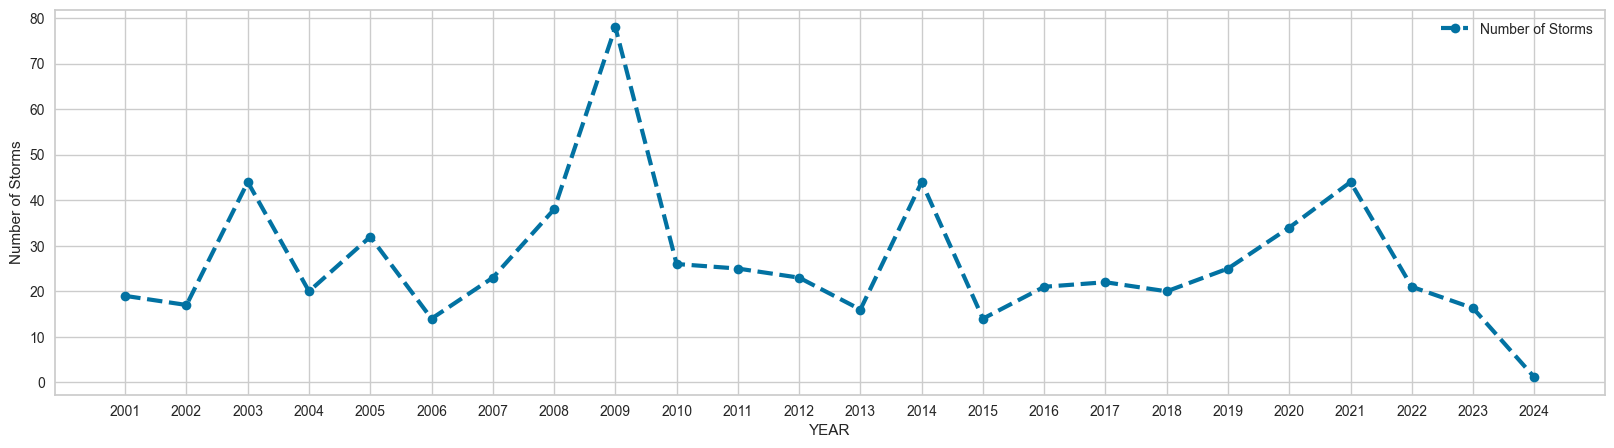

In [46]:
# Concatenate the two DataFrames
merged_df = pd.concat([data, predictions_future], keys=['Actual', 'Predicted'])

# Group by year and sum the 'Open' column
grouped_by_year = merged_df.groupby('YEAR')['NUMBER_OF_STORMS'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 5))

plt.plot(grouped_by_year['YEAR'], grouped_by_year['NUMBER_OF_STORMS'], linewidth=3, linestyle='dashed', marker='o', label='Number of Storms')

# Set x-axis ticks for each individual year
plt.xticks(grouped_by_year['YEAR'])

# Set labels and legend
plt.xlabel('YEAR')
plt.ylabel('Number of Storms')
plt.legend()

# Show the plot
plt.show()